In [1]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv(r"FullData.csv")
data['Date of birth']= pd.to_datetime(data['Date of birth'],format='%Y-%m-%d') 
data.head()

,Panelist ID,Sex code,Date of birth,Marital status,Household status,Working status,Terminal age of education,Welsh Language code,Gaelic language code,Dependency of Children,...,Genre Hobbies/Leisure,Genre Documentaries,Genre Religious,Genre Sport,Genre Children,Genre PP Broadcast,Genre Education,Genre Other Films,Genre Other,Genre Other.1
0,9013301,2,1970-04-01,1,2,2,2,9,9,9,...,4.00,12.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,4082903,2,2010-11-01,2,1,5,4,9,9,9,...,0.00,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,151.77
2,5058901,2,1971-06-01,1,2,4,2,9,9,9,...,606.73,1751.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.13
3,52001,1,1956-10-01,2,4,4,1,9,9,9,...,439.03,1112.9,0.0,54.0,34.0,0.0,0.0,0.0,0.0,506.87
4,3673203,2,1997-10-01,2,1,5,4,9,9,9,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00


In [13]:
cols=['Presence of Children','Genre Drama',
       'Genre Soaps', 'Genre Series Drama Generic', 'Genre Cinema Films',
       'Genre TV Fils', 'Genre Entertainment', 'Genre Music', 'Genre Arts',
       'Genre News/Weather', 'Genre Current Affairs', 'Genre Hobbies/Leisure',
       'Genre Documentaries', 'Genre Religious', 'Genre Sport',
       'Genre Children', 'Genre PP Broadcast', 'Genre Education',
       'Genre Other Films', 'Genre Other', 'Genre Other.1']
y='Sex code'

In [14]:
train_X, test_X, train_y, test_y = train_test_split(data[cols], data[y], train_size=0.7, test_size=0.3, random_state=123)

In [15]:
dtree=DecisionTreeClassifier(max_leaf_nodes=10)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc2=accuracy_score(train_y, predictions2)

print(acc)
print(acc2)


0.5952380952380952
0.5932227420955621


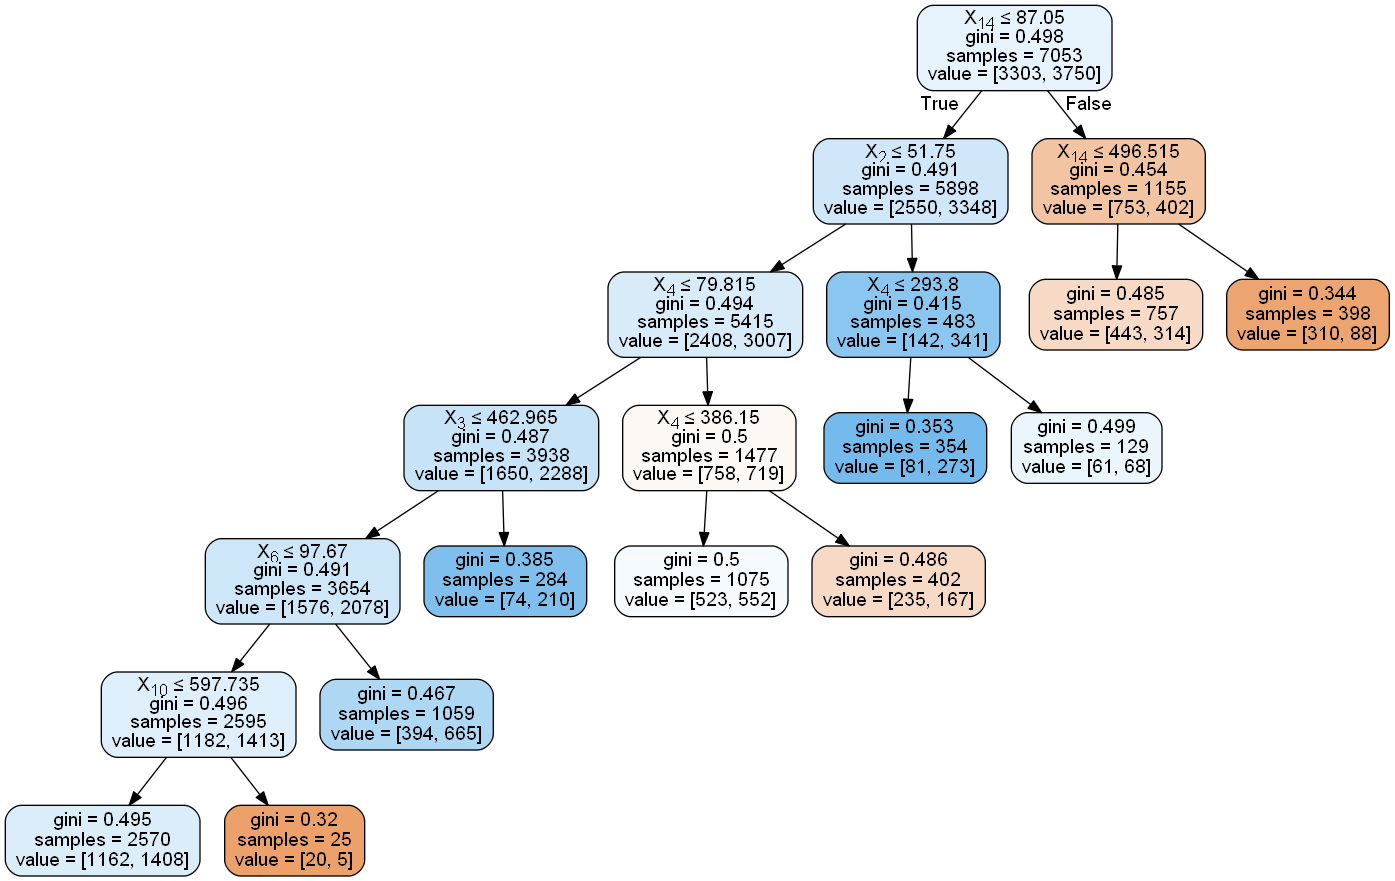

In [17]:
dot_data_entropia = StringIO()
export_graphviz(dtree, out_file=dot_data_entropia,  
                filled=True, rounded=True,
                special_characters=True)
graph_entropia = pydotplus.graph_from_dot_data(dot_data_entropia.getvalue())  
Image(graph_entropia.create_png())